In [1]:
"""
6 sept 2021
je veux verifier que mon script pour construire le dataset D4 exp2 ne fait pas n importe quoi
"""

'\n6 sept 2021\n\n'

In [6]:
import logging
import time
import numpy as np
import xarray
import datetime
import sys
from importlib import reload
reload(logging)
logging.basicConfig(level=logging.DEBUG)
sys.path.append('/home1/datahome/agrouaze/git/mpc/data_collect')

In [7]:
import rebuild_training_dataset_exp2
reload(rebuild_training_dataset_exp2)

env: CUDA_VISIBLE_DEVICES=0


<module 'rebuild_training_dataset_exp2' from '/home1/datahome/agrouaze/sources/git/sar_hs_nn/sarhspredictor/bin/rebuild_training_dataset_exp2.py'>

In [8]:
one_tiff = '/home/datawork-cersat-public/cache/project/mpc-sentinel1/data/esa/sentinel-1a/L1/WV/S1A_WV_SLC__1S/2019/278/S1A_WV_SLC__1SSV_20191005T163939_20191005T171407_029326_035559_2461.SAFE/measurement/s1a-wv1-slc-vv-20191005t165023-20191005t165026-029326-035559-045.tiff'
sys.path.append('/home1/datahome/agrouaze/git/xsarseafork/')
import xsarsea
slc  = xsarsea.cross_spectra_core.read_slc(one_tiff,slice_subdomain=None)

INFO:root:tiff: /home/datawork-cersat-public/cache/project/mpc-sentinel1/data/esa/sentinel-1a/L1/WV/S1A_WV_SLC__1S/2019/278/S1A_WV_SLC__1SSV_20191005T163939_20191005T171407_029326_035559_2461.SAFE/measurement/s1a-wv1-slc-vv-20191005t165023-20191005t165026-029326-035559-045.tiff
INFO:root:resampling : None
INFO:root:safepath: /home/datawork-cersat-public/cache/project/mpc-sentinel1/data/esa/sentinel-1a/L1/WV/S1A_WV_SLC__1S/2019/278/S1A_WV_SLC__1SSV_20191005T163939_20191005T171407_029326_035559_2461.SAFE
INFO:root:tmp: /home/datawork-cersat-public/cache/project/mpc-sentinel1/data/esa/sentinel-1a/L1/WV/S1A_WV_SLC__1S/2019/278/S1A_WV_SLC__1SSV_20191005T163939_20191005T171407_029326_035559_2461.SAFE
DEBUG:xsar.xml_parser:get_compound_var no cache hit for 'safe_attributes' on file manifest.safe
DEBUG:xsar.xml_parser:get_var no cache hit for jpath 'manifest.ipf_version' on file manifest.safe
DEBUG:xsar.xml_parser:xpath no cache hit for '//xmlData/safe:processing/safe:facility/safe:software/@v

In [11]:
slc

<xarray.Dataset>
Dimensions:         (azimuth: 4930, pol: 1, range: 5663)
Coordinates:
  * pol             (pol) object 'VV'
  * azimuth         (azimuth) float64 0.0 4.157 8.315 ... 2.049e+04 2.049e+04
  * range           (range) float64 0.0 8.838 17.68 ... 5.003e+04 5.004e+04
Data variables: (12/15)
    digital_number  (pol, azimuth, range) complex128 dask.array<chunksize=(1, 4930, 5000), meta=np.ndarray>
    time            (azimuth) datetime64[ns] 2019-10-05T16:50:23.720915968 .....
    longitude       (azimuth, range) float32 dask.array<chunksize=(4930, 5000), meta=np.ndarray>
    latitude        (azimuth, range) float32 dask.array<chunksize=(4930, 5000), meta=np.ndarray>
    land_mask       (azimuth, range) int8 dask.array<chunksize=(4930, 5000), meta=np.ndarray>
    ground_heading  (azimuth, range) float32 dask.array<chunksize=(4930, 5000), meta=np.ndarray>
    ...              ...
    nesz            (pol, azimuth, range) float64 dask.array<chunksize=(1, 4930, 5000), meta=np.ndarray>
    gamma0_raw      (pol, azimuth, range) float64 dask.array<chunksize=(1, 4930, 5000), meta=np.ndarray>
    negz            (pol, azimuth, range) float64 dask.array<chunksize=(1, 4930, 5000), meta=np.ndarray>
    sigma0          (pol, azimuth, range) float64 dask.array<chunksize=(1, 4930, 5000), meta=np.ndarray>
    gamma0          (pol, azimuth, range) float64 dask.array<chunksize=(1, 4930, 5000), meta=np.ndarray>
    modulation      (pol, azimuth, range) complex128 dask.array<chunksize=(1, 4930, 5000), meta=np.ndarray>
Attributes: (12/18)
    ipf:               3.1
    platform:          SENTINEL-1A
    swath:             WV
    product:           SLC
    pols:              VV
    name:              SENTINEL1_DS:/home/datawork-cersat-public/cache/projec...
    ...                ...
    orbit_pass:        Descending
    platform_heading:  -167.8732062686768
    Conventions:       CF-1.7
    azimuthSpacing:    4.157276105069675
    rangeSpacing:      8.83808470996194
    heading:           -167.8732062686768

# check splitting in 5 sub domains

In [29]:
reload(logging)
logging.basicConfig(level=logging.INFO)
%matplotlib inline
sys.path.append('/home1/datahome/agrouaze/git/sar_hs_nn')
import sarhspredictor.lib.comp_xspec_on_5_sub_domains
reload(sarhspredictor.lib.comp_xspec_on_5_sub_domains)

#from sarhspredictor.lib.comp_xspec_on_5_sub_domains import prepare_image_splitting_in_5_domains
didi,geoloc = sarhspredictor.lib.comp_xspec_on_5_sub_domains.prepare_image_splitting_in_5_domains(slc,delta_image_limits=4,limited_width_domains=None)
didi,geoloc = sarhspredictor.lib.comp_xspec_on_5_sub_domains.prepare_image_splitting_in_5_domains(slc,delta_image_limits=4,limited_width_domains=512)

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:xsar.xml_parser:get_compound_var cache hit for 'noise_lut_azi' on file noise-s1a-wv1-slc-vv-20191005t165023-20191005t165026-029326-035559-045.xml
DEBUG:xsar.xml_parser:get_compound_var cache hit for 'noise_lut_range' on file noise-s1a-wv1-slc-vv-20191005t165023-20191005t165026-029326-035559-045.xml
DEBUG:xsar.xml_parser:get_compound_var cache hit for 'sigma0_lut' on file calibration-s1a-wv1-slc-vv-20191005t165023-20191005t165026-029326-035559-045.xml
DEBUG:rasterio._io:Output nodata value read from file: -10000000000.0
DEBUG:rasterio._io:Output nodata values: [-10000000000.0]
DEBUG:rasterio._io:all_valid: True
DEBUG:rasterio._io:mask_flags: ([<MaskFlags.all_valid: 1>],)
DEBUG:rasterio._io:Jump straight to _read()
DEBUG:rasterio._io:Window: Window(col_off=0, row_off=0, width=5000, height=4930)
DEBUG:rasterio._io:IO window xoff=0.0 yoff=0.0 width=5000.0 height=4930.0
DEBUG:rasterio._io

## display map of image and rectangle

In [30]:
print(1)

1


<class 'array.array'> 5


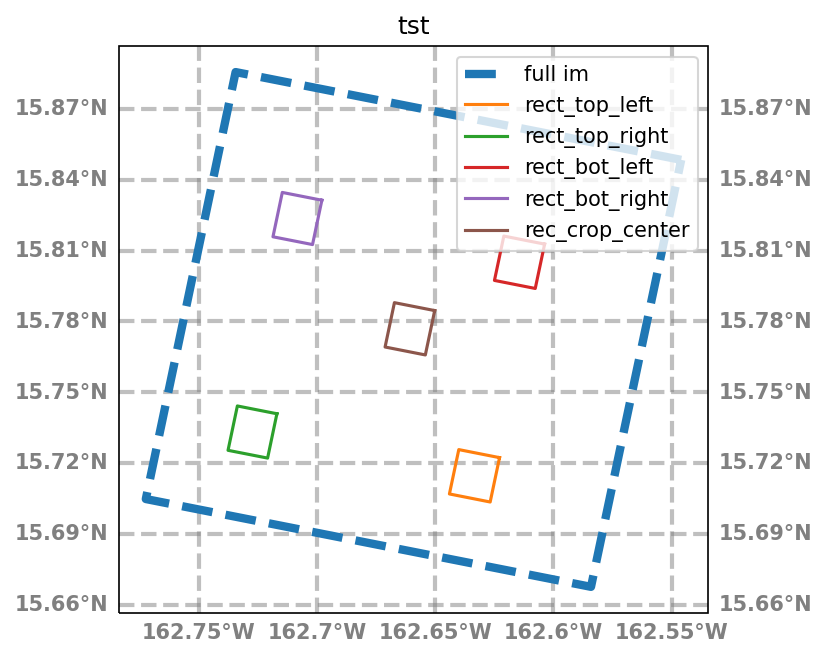

In [32]:
reload(logging)
logging.basicConfig(level=logging.INFO)
import shapely.wkt
from matplotlib import pyplot as plt
#example super simple
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
plt.figure(figsize=(7,5),dpi=150)

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('tst')
#ax.set_extent([-170, 170, -75, 75])
#ax.set_extent([, 170, -75, 75])
P = shapely.wkt.loads(slc.footprint)
print(type(P.exterior.xy[0]),len(P.exterior.xy[0]))
plt.plot(P.exterior.xy[0],P.exterior.xy[1],'--',lw=4,label='full im')
ax.coastlines(antialiased=True)
for ii in geoloc:
    plt.plot(geoloc[ii]['lons'],geoloc[ii]['lats'],label=ii)
#im = plt.scatter(ds['alti_lon'],ds['alti_lat'],c=ds['alti_hs'],s=4)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'color': 'gray', 'weight': 'bold'}
#plt.colorbar(im,fraction=0.02, pad=0.04)
plt.legend()
plt.show()

# read sar data

In [ ]:
sar='S1A'
alt=''
list_dscoloc_enriched = rebuild_training_dataset_exp2.read_all_SAR_variables(sar_unit=args.sar_unit,alti_mission=args.alti,date_day=date_to_treat_dt,dev=args.dev)

# check number of colocs per day with CCI

In [1]:
import glob
import os
dd_col = '/home/datawork-cersat-public/cache/project/mpc-sentinel1/analysis/s1_data_analysis/hs_nn/cci_orbit_files/v3.2_colocations_CCI/'
lst_col = sorted(glob.glob(os.path.join(dd_col,'*','*','*nc')))
print('lst_col',len(lst_col))

lst_col 1568


In [2]:
print(lst_col[0])

/home/datawork-cersat-public/cache/project/mpc-sentinel1/analysis/s1_data_analysis/hs_nn/cci_orbit_files/v3.2_colocations_CCI/S1A_jason-2/2015/coloc_CCI_20150319_S1A_jason-2_3_hours_2_degree.nc


# display count per day of colocs

In [23]:
import xarray
ds_coloc = xarray.open_mfdataset(lst_col,combine='nested',compat='override')
ds_coloc

KeyboardInterrupt: 

In [3]:
# plus simple avec netCDF4
import netCDF4
import datetime
dates_col = []
nb_col = []
for ffi,ff in enumerate(lst_col):
    if ffi%100==0:
        print(ffi,'/',len(lst_col))
    nc = netCDF4.Dataset(ff)
    nb_col.append(len(nc.variables['time_sar'][:]))
    nc.close()
    dates_col.append(datetime.datetime.strptime(os.path.basename(ff).split('_')[2],'%Y%m%d'))
    #print(nb_col,dates_col)
    #dùsdklkfsdm
print('done')

0 / 1568
100 / 1568
200 / 1568
300 / 1568
400 / 1568
500 / 1568
600 / 1568
700 / 1568
800 / 1568
900 / 1568
1000 / 1568
1100 / 1568
1200 / 1568
1300 / 1568
1400 / 1568
1500 / 1568
done


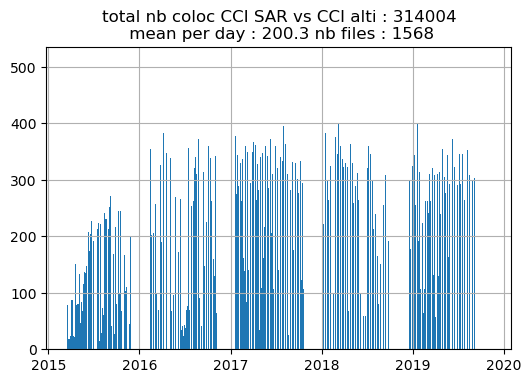

In [4]:
import numpy as np
from matplotlib import pyplot as plt
plt.figure(dpi=100)
plt.grid(True)
plt.title('total nb coloc CCI SAR vs CCI alti : %s\n mean per day : %1.1f nb files : %i'%(np.sum(nb_col),np.mean(nb_col),len(lst_col)))
dates_col = np.array(dates_col)
nb_col = np.array(nb_col)
plt.bar(dates_col,nb_col)
plt.show()

# debug mf open sar cci data

In [99]:
import xarray as xr
sat = 'S1A'
date = datetime.datetime(2018,11,29)
Y = '2018'
JY = date.strftime('%j')
path_SAR = '/home/datawork-cersat-public/cache/project/mpc-sentinel1/analysis/s1_data_analysis/hs_nn/cci_orbit_files/v3.2'
Input_SAR = sorted(glob.glob(os.path.join(path_SAR , sat ,Y,
            JY ,'ESACCI-SEASTATE-L2P-SWH-Sentinel-%s'%sat[1:]+'-'+date.strftime('%Y%m%d')+'T*-QUACH2020_v3.2-fv01.nc')))
print('nb files SAR : %s',len(Input_SAR))
#  args.sat + '_' + args.sat_mode + '_' + args.startdate + '_level2_LOPS_SWH_SAR_v3.0.nc')
#if os.path.exists(Input_SAR[0]) is False:
#    raise Exception('SAR file :%s doesnt exist'%Input_SAR)
dates_all = None
dates_all2 = []
for ffi,ff in enumerate(Input_SAR):
    print(ffi,'/',len(Input_SAR))
    
    tmpds = xr.open_dataset(ff)
    tmp_times = tmpds['time']
    for ii in tmp_times:
        if ii not in dates_all2:
            dates_all2.append(ii)
        else:
            print('alerte doublon',ii,ff)
            mlksdfmlksdfkm
    if dates_all is None:
        dates_all = tmp_times
    else:
        dates_all = xr.concat([dates_all,tmp_times],dim='time')
    
print(len(dates_all))


nb files SAR : %s 37
0 / 37
1 / 37
2 / 37
3 / 37
4 / 37
5 / 37
6 / 37
7 / 37
alerte doublon <xarray.DataArray 'time' ()>
array('2018-11-29T05:12:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-11-29T05:12:53
    lon      float32 ...
    lat      float32 ...
Attributes:
    long_name:      measurement time
    axis:           T
    standard_name:  time /home/datawork-cersat-public/cache/project/mpc-sentinel1/analysis/s1_data_analysis/hs_nn/cci_orbit_files/v3.2/S1A/2018/333/ESACCI-SEASTATE-L2P-SWH-Sentinel-1A-20181129T051253-QUACH2020_v3.2-fv01.nc


NameError: name 'mlksdfmlksdfkm' is not defined

In [101]:
def prep_cci_sar(ds):
    filee = ds.encoding['source']
    print(os.path.basename(filee))
    #print(ds['time'].values)
    print('duplicate ?',len(ds['time'].values)-np.unique(ds['time'].values).size)
    print('not finite?',(np.isfinite(ds['time'].values)==False).sum())
    ds = ds.sortby('time')
    return ds
    
SAR = xr.open_mfdataset(Input_SAR,preprocess=prep_cci_sar,combine='nested')

ESACCI-SEASTATE-L2P-SWH-Sentinel-1A-20181129T000604-QUACH2020_v3.2-fv01.nc
duplicate ? 0
not finite? 0
ESACCI-SEASTATE-L2P-SWH-Sentinel-1A-20181129T014346-QUACH2020_v3.2-fv01.nc
duplicate ? 0
not finite? 0
ESACCI-SEASTATE-L2P-SWH-Sentinel-1A-20181129T021959-QUACH2020_v3.2-fv01.nc
duplicate ? 0
not finite? 0
ESACCI-SEASTATE-L2P-SWH-Sentinel-1A-20181129T035938-QUACH2020_v3.2-fv01.nc
duplicate ? 0
not finite? 0
ESACCI-SEASTATE-L2P-SWH-Sentinel-1A-20181129T042406-QUACH2020_v3.2-fv01.nc
duplicate ? 0
not finite? 0
ESACCI-SEASTATE-L2P-SWH-Sentinel-1A-20181129T045902-QUACH2020_v3.2-fv01.nc
duplicate ? 0
not finite? 0
ESACCI-SEASTATE-L2P-SWH-Sentinel-1A-20181129T050943-QUACH2020_v3.2-fv01.nc
duplicate ? 0
not finite? 0
ESACCI-SEASTATE-L2P-SWH-Sentinel-1A-20181129T051253-QUACH2020_v3.2-fv01.nc
duplicate ? 0
not finite? 0
ESACCI-SEASTATE-L2P-SWH-Sentinel-1A-20181129T053520-QUACH2020_v3.2-fv01.nc
duplicate ? 0
not finite? 0
ESACCI-SEASTATE-L2P-SWH-Sentinel-1A-20181129T071723-QUACH2020_v3.2-fv01.n

In [102]:
SAR

<xarray.Dataset>
Dimensions:                  (time: 2104)
Coordinates:
  * time                     (time) datetime64[ns] 2018-11-29T00:06:04 ... 20...
    lon                      (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
    lat                      (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
Data variables: (12/17)
    angle_of_incidence       (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
    wind_speed               (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
    sigma0                   (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
    normalized_variance      (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
    heading                  (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
    swh                      (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
    ...                       ...
    surface_air_temperature  (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
    surface_air_pressure     (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
    swh_model                (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
    bathymetry               (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
    sea_ice_fraction         (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
    distance_to_coast        (time) float32 dask.array<chunksize=(2104,), meta=np.ndarray>
Attributes: (12/64)
    institution:                   University of Hawaii , Laboratory of Physi...
    institution_abbreviation:      UH, Ifremer-LOPS, ESA
    publisher_name:                cersat
    publisher_url:                 cersat.ifremer.fr
    publisher_email:               cersat@ifremer.fr
    publisher_institution:         Ifremer / Cersat
    ...                            ...
    band:                          C
    source_version:                Quach 2020 / v3.2
    input:                         Level-2 ESA WV OCN products: S1A_WV_OCN__2...
    Metadata_Conventions:          Climate and Forecast (CF) 1.7, Attribute C...
    geospatial_vertical_units:     meters above mean sea level
    geospatial_vertical_positive:  up

In [96]:
import netCDF4
nc = netCDF4.Dataset(Input_SAR[1])
times_nc = nc.variables['time'][:]
print(nc.variables['time'])
print(times_nc)
print(times_nc.shape,times_nc.size,len(nc.variables['time']))

<class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    _FillValue: -2147483648
    long_name: measurement time
    axis: T
    standard_name: time
    units: seconds since 1990-01-01
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (38,)
filling on
[912303826 912303840 912303855 912303870 912303884 912303899 912303914
 912303928 912303943 912303958 912303972 912303987 912304002 912304016
 912304031 912304046 912304060 912304075 912304089 912304104 912304119
 912304133 912304148 912304163 912304177 912304192 912304207 912304221
 912304236 912304251 912304265 912304280 912304294 912304309 912304324
 912304338 912304353 912304368]
(38,) 38 38


<xarray.DataArray 'time' (time: 2161)>
array([1543449964000000000, 1543449979000000000, 1543449993000000000, ...,
       1543536214000000000, 1543536229000000000, 1543536244000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-11-29T00:06:04 ... 2018-11-30T00:04:04
    lon      (time) float32 88.56 86.67 88.19 86.31 ... -87.13 -88.96 -87.5
    lat      (time) float32 16.92 16.36 15.15 14.59 ... 3.787 5.016 5.56 6.786
Attributes:
    long_name:      measurement time
    axis:           T
    standard_name:  time
2161
bad pt (array([487]),) <xarray.DataArray 'time' (time: 1)>
array([1543469193000000000], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-11-29T05:26:33
    lon      (time) float32 -24.86
    lat      (time) float32 -68.22
Attributes:
    long_name:      measurement time
    axis:           T
    standard_name:  time
mode ModeResult(mode=array([15000000000]), count=array([1376]))


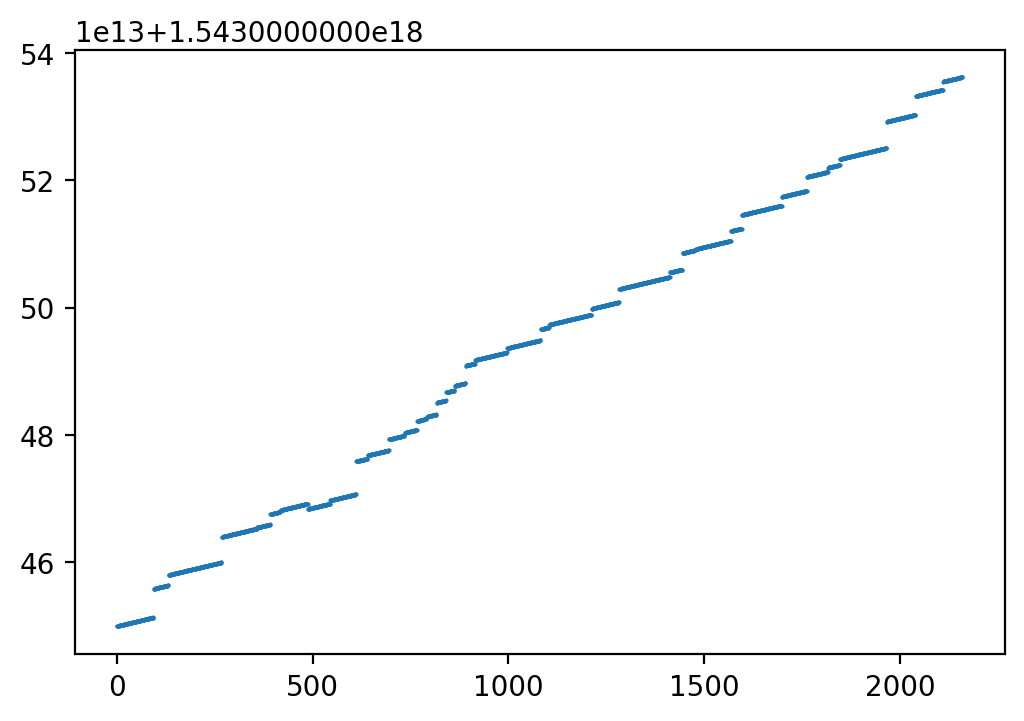

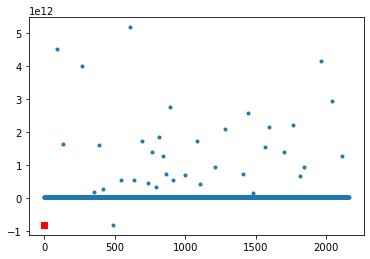

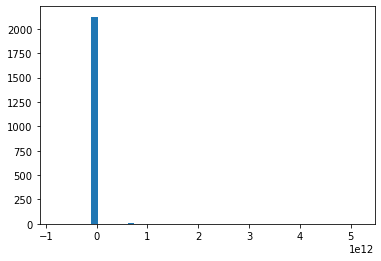

In [83]:
print(dates_all)
dates_all = dates_all.astype('<m8[ns]')
diff  = []
print(len(dates_all))
for uu,dd in enumerate(dates_all):
    if uu<len(dates_all)-1:
        tmptmp = dates_all[uu+1].values-dates_all[uu].values
        rmp2 = int(tmptmp)
        diff.append(rmp2)
#print(diff)
diff = np.array(diff)
plt.figure(dpi=200)
plt.plot(dates_all,'.',ms=1)
plt.figure()
plt.plot(diff,'.')
plt.plot(diff[diff<=0],'rs')
np.all(diff > 0)
print('bad pt',np.where(diff<=0),dates_all[np.where(diff<=0)])

plt.figure()
plt.hist(diff,50)
import scipy
print('mode',scipy.stats.mode(diff))

In [87]:
print(dates_all.values)

['2018-11-29T00:06:04.000000000' '2018-11-29T00:06:19.000000000'
 '2018-11-29T00:06:33.000000000' ... '2018-11-30T00:03:34.000000000'
 '2018-11-30T00:03:49.000000000' '2018-11-30T00:04:04.000000000']


probleme de lecture des data de coloc CCI sea state alti vs SAR WV resolu avec lecture separee pour les couple sar/alti